### ANOVA на практике

In [2]:
import pandas as pd
import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
import pingouin as pg
import seaborn as sns

In [3]:
post_likes = pd.read_csv("5_post_likes.csv")

In [6]:
post_likes.head()

,id,button,likes
0,S001,red,160
1,S002,red,150
2,S003,red,150
3,S004,red,150
4,S005,red,187


Порисуем графички:

C:\Users\911\AppData\Local\Temp\ipykernel_5960\3614082902.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="button", y="likes", data=post_likes, palette=["r", "g", "b"])


<Axes: xlabel='button', ylabel='likes'>

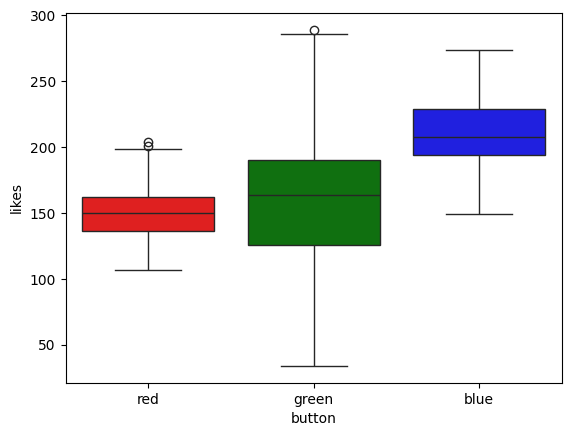

In [7]:
sns.boxplot(x="button", y="likes", data=post_likes, palette=["r", "g", "b"])

C:\Users\911\AppData\Local\Temp\ipykernel_5960\2953494500.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="button", y="likes", data=post_likes, palette=["r", "g", "b"])


<Axes: xlabel='button', ylabel='likes'>

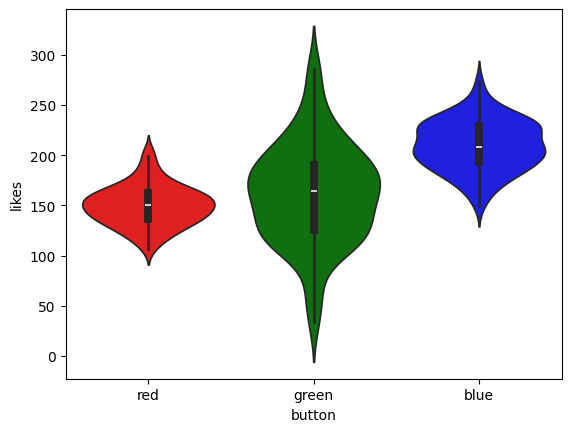

In [8]:
#скрипичный график
sns.violinplot(x="button", y="likes", data=post_likes, palette=["r", "g", "b"])

Три способа посчитать однофакторный ANOVA:

In [9]:
#через scipy
red = post_likes.query("button == 'red'").likes
green = post_likes.query("button == 'green'").likes
blue = post_likes.query("button == 'blue'").likes

In [10]:
post_likes.query("button == 'red'").likes

0     160
1     150
2     150
3     150
4     187
     ... 
95    170
96    164
97    125
98    152
99    126
Name: likes, Length: 100, dtype: int64

In [11]:
ss.f_oneway(red, green, blue)
# statistic - F статистика: (межгрупповая дисперсия в 85,99 раз больше, чем внутригрупповая)
# pvalue - 3,43 * 10 ** -30 (очень маленькое число)
# вывод: pvalue гораздо < 0,05 - группы действительно различаются между собой
# не самый удобный вариант - каждую группу нужно выделять отдельно, мало выводов

F_onewayResult(statistic=np.float64(85.99631112614011), pvalue=np.float64(3.437004581021769e-30))

In [12]:
#через statsmodels
model = smf.ols(formula = "likes ~ C(button)", data = post_likes).fit()
anova_lm(model)
# C() означает, что переменная в скобках - категориальная
# .fit() - метод, который позволяет примерить модель (в нашем случае дисперсионный анализ) к реальным данным / построение модели по реальным данным
# C(button): Источник вариации от фактора (кнопки). Показывает, сколько изменчивости в likes объясняется различиями между группами кнопок.
# Residual (остаток): Необъяснённая вариация (случайные ошибки внутри групп). Это "шум", который фактор не объясняет.
# C(button)/df - степени свободы
# Residual/df - межгрупповая сумма квадратов
# sum_sq - сумма квадратов, 
# mean_sq - средняя сумма квадратов: сумма квадратов, которая скорректирована на степени свободы (sum_sq/df)
# F - F статистика (mean_sq/mean_sq (делим верхнее значение на нижее))
# PR(>F) - pvalue
# вывод: pvalue гораздо < 0,05 - группы действительно различаются между собой

,df,sum_sq,mean_sq,F,PR(>F)
C(button),2.0,201960.286667,100980.143333,85.996311,3.437005e-30
Residual,297.0,348748.710000,1174.238081,NaN,NaN


In [13]:
#через pingouin
pg.anova(data=post_likes, dv="likes", between="button")
# np2 - размер эффекта дисперсионного анализа

,Source,ddof1,ddof2,F,p-unc,np2
0,button,2,297,85.996311,3.437005e-30,0.366728


<Axes: xlabel='button', ylabel='likes'>

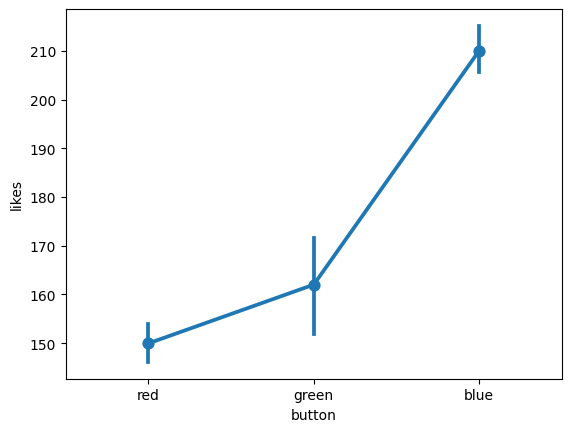

In [14]:
#средние с доверительными интервалами
sns.pointplot(x="button", y="likes", data=post_likes)

Тестируем нормальность:

In [15]:
#через scipy 
print(ss.shapiro(red))
print(ss.shapiro(blue))
print(ss.shapiro(green))
# порог в 0,05 ни что не пересекает, это означает, что наши данные значимо от нормальных не отличаются

ShapiroResult(statistic=np.float64(0.9881042719700356), pvalue=np.float64(0.5159271795029703))
ShapiroResult(statistic=np.float64(0.9937933538295788), pvalue=np.float64(0.930978144920684))
ShapiroResult(statistic=np.float64(0.9887177694213334), pvalue=np.float64(0.5625343189802698))


In [16]:
#другой вариант
print(ss.normaltest(red))
print(ss.normaltest(blue))
print(ss.normaltest(green))
# порог в 0,05 ни что не пересекает, это означает, что наши данные значимо от нормальных не отличаются

NormaltestResult(statistic=np.float64(1.834358590753997), pvalue=np.float64(0.3996447324611219))
NormaltestResult(statistic=np.float64(0.4606964500747045), pvalue=np.float64(0.7942569741771747))
NormaltestResult(statistic=np.float64(0.6727062715909409), pvalue=np.float64(0.7143707913703767))


In [ ]:
# normaltest - для больших выборок
pg.normality(data=post_likes, dv="likes", group="button", method="normaltest")
# W - статистика Шапиро-Уилка
# pval - p-значение теста на нормальность
# вывод: все группы значимо от нормальных не отличаются

,W,pval,normal
button,,,
red,1.834359,0.399645,True
green,0.672706,0.714371,True
blue,0.460696,0.794257,True


In [ ]:
# shapiro - для маленьких выборок
pg.normality(data=post_likes, dv="likes", group="button", method="shapiro")

,W,pval,normal
button,,,
red,0.988104,0.515927,True
green,0.988718,0.562534,True
blue,0.993793,0.930978,True


Можно квантиль-квантиль графики:

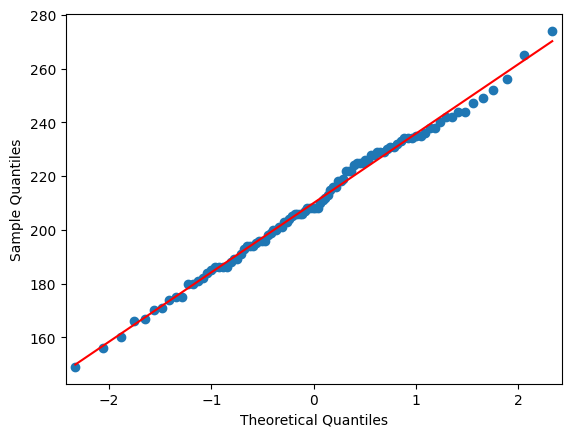

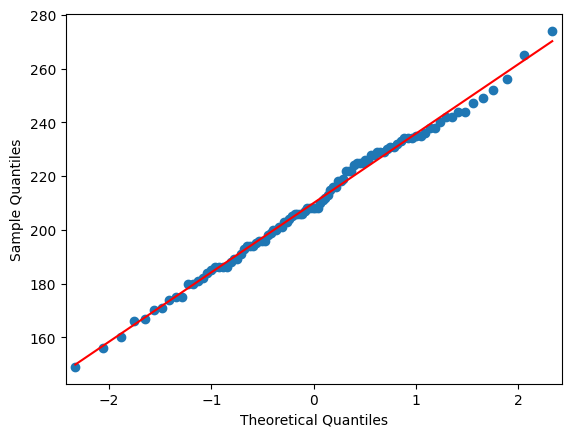

In [18]:
sm.qqplot(blue, line="r")

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

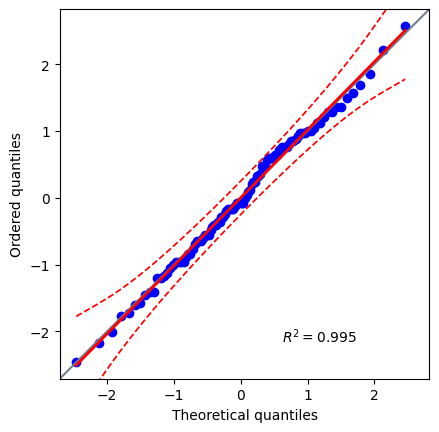

In [19]:
pg.qqplot(blue)

Тестируем различие в дисперсиях:

In [ ]:
#через scipy
ss.levene(red, green, blue)
# вывод: pvalue < 0,05 - отклоняем нулевую гипотезу о гомогенности дисперсий и делаем выводы, что дисперсии значимо отличаются

LeveneResult(statistic=np.float64(35.214282435572876), pvalue=np.float64(1.8886636651083753e-14))

In [ ]:
#через pingouin
pg.homoscedasticity(data=post_likes, dv="likes", group="button")
# W - статистика Левена
# pval - p-значение теста Левена
# вывод: pvalue < 0,05 - отклоняем нулевую гипотезу о гомогенности дисперсий и делаем выводы, что дисперсии значимо отличаются

,W,pval,equal_var
levene,35.214282,1.888664e-14,False


In [ ]:
# anova Уэлча в pingouin -  это не дисперсионный анализ, а множественное сравнение. Выбираем не просто anova, welch_anova - т.к. дисперсии различаются
pg.welch_anova(data=post_likes, dv="likes", between="button")
# np2 - размер эффекта дисперсионного анализа
# вывод: pvalue гораздо < 0,05 - отклоняем нулевую гипотезу и делаем вывод, что среднее хотя бы одной из групп значимо отдиается от средних в других группах

,Source,ddof1,ddof2,F,p-unc,np2
0,button,2,182.958104,177.856578,1.255660e-43,0.366728


#### Множественные сравнения

In [23]:
from scipy.special import comb

In [24]:
comb(10, 2)

np.float64(45.0)

In [25]:
1 - 0.95**45

0.9005597430129078

In [31]:
#попарные сравнения без поправки
pg.pairwise_ttests(data=post_likes, dv="likes", between="button")
# A, B - сравниваемые группы
# Paired - указывает, являются ли выборки зависимыми
# Parametric - является ли сравнение параметрическим (выбор м/у т.тестом и тестом Манна-Уитни)
# Т-статистика
# dof - степени свободы
# alternative - односторонность или двухсторонность проверки гипотезы
# p-unc -  нескорректированное p-значение
# BF10 - Байесовский фактор (альтернатива p-value)
# hedges - стандартизованный размер эффекта (берем различия в средних и делим на стандартное отклонение, связанное с каждой группой)
# cohen - размер эффекта Коэна (похож на Hedges, но не учитывает размер выборки)
# CI95% - доверительный интервал для разницы между средними значениями двух групп
# вывод: все группы значимо различаются между собой

c:\Users\911\AppData\Local\Programs\Python\Python313\Lib\site-packages\pingouin\pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,button,blue,green,False,True,8.591097,198.0,two-sided,2.561866e-15,2.025e+12,1.210357
1,button,blue,red,False,True,18.769214,198.0,two-sided,7.952330e-46,1.582e+42,2.644301
2,button,green,red,False,True,2.240189,198.0,two-sided,2.619001e-02,1.583,0.315609


In [32]:
#с поправкой Бонферрони (на самом деле тут взята поправка Холма)
pg.pairwise_ttests(data=post_likes, dv="likes", between="button", padjust="holm")
# A, B - сравниваемые группы
# Paired - указывает, являются ли выборки зависимыми
# Parametric - является ли сравнение параметрическим (выбор м/у т.тестом и тестом Манна-Уитни)
# Т-статистика
# dof - степени свободы
# alternative - односторонность или двухсторонность проверки гипотезы

c:\Users\911\AppData\Local\Programs\Python\Python313\Lib\site-packages\pingouin\pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,button,blue,green,False,True,8.591097,198.0,two-sided,2.561866e-15,5.123733e-15,holm,2.025e+12,1.210357
1,button,blue,red,False,True,18.769214,198.0,two-sided,7.952330e-46,2.385699e-45,holm,1.582e+42,2.644301
2,button,green,red,False,True,2.240189,198.0,two-sided,2.619001e-02,2.619001e-02,holm,1.583,0.315609


In [30]:
#тьюки(делает поправку на множественные сравнения)
pg.pairwise_tukey(data=post_likes, dv="likes", between="button")
# A, B - сравниваемые группы
# meandiff - разница между средними значениями двух групп
# p-adj - скорректированное p-значение с учетом множественных сравнений
# lower - нижняя граница доверительного интервала для разницы между средними значениями двух групп
# upper - верхняя граница доверительного интервала для разницы между средними значениями двух групп
# reject - логическое значение, указывающее, отклонается ли нулевая гипотеза на основе скорректированного p-значения и уровня значимости (обычно 0,05)  
# вывод: все группы значимо различаются между собой

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,blue,green,210.03,162.02,48.01,4.846108,9.906919,1.143530e-14,1.210357
1,blue,red,210.03,149.96,60.07,4.846108,12.395514,1.143530e-14,2.644301
2,green,red,162.02,149.96,12.06,4.846108,2.488595,3.557351e-02,0.315609


In [29]:
#геймс-хоувелл (делает поправку на неравенство дисперсий)
pg.pairwise_gameshowell(data=post_likes, dv="likes", between="button")
# A, B - сравниваемые группы
# meandiff - разница между средними значениями двух групп
# p-adj - скорректированное p-значение с учетом множественных сравнений
# lower - нижняя граница доверительного интервала для разницы между средними значениями двух групп
# upper - верхняя граница доверительного интервала для разницы между средними значениями двух групп
# reject - логическое значение, указывающее, отклонается ли нулевая гипотеза на основе скорректированного p-значения и уровня значимости (обычно 0,05)  
# вывод: все группы значимо различаются между собой

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,blue,green,210.03,162.02,48.01,5.588343,8.591097,145.583529,2.242651e-14,1.210357
1,blue,red,210.03,149.96,60.07,3.200454,18.769214,188.902921,0.000000e+00,2.644301
2,green,red,162.02,149.96,12.06,5.383475,2.240189,129.889834,6.830241e-02,0.315609


In [33]:
pairwise_tukeyhsd(post_likes.likes, post_likes.button).summary()
# C() означает, что переменная в скобках - категориальная
# .fit() - метод, который позволяет примерить модель (в нашем случае дисперсионный анализ) к реальным данным / построение модели по реальным данным 
# вывод: все группы значимо различаются между собой

group1,group2,meandiff,p-adj,lower,upper,reject
blue,green,-48.01,0.0,-59.4251,-36.5949,True
blue,red,-60.07,0.0,-71.4851,-48.6549,True
green,red,-12.06,0.0356,-23.4751,-0.6449,True


In [34]:
MultiComparison(post_likes.likes, post_likes.button).tukeyhsd().summary()
# C() означает, что переменная в скобках - категориальная
# .fit() - метод, который позволяет примерить модель (в нашем случае дисперсионный анализ) к реальным данным / построение модели по реальным данным     
# вывод: все группы значимо различаются между собой

group1,group2,meandiff,p-adj,lower,upper,reject
blue,green,-48.01,0.0,-59.4251,-36.5949,True
blue,red,-60.07,0.0,-71.4851,-48.6549,True
green,red,-12.06,0.0356,-23.4751,-0.6449,True


#### Многофакторный ANOVA

In [35]:
#грузим многофакторные данные

ads_clicks = pd.read_csv("5_ads_clicks.csv")

In [36]:
ads_clicks.head()

,id,ads,age_group,clicks
0,S001,classic,18-27,40
1,S002,classic,18-27,22
2,S003,classic,18-27,41
3,S004,classic,18-27,35
4,S005,classic,18-27,39


In [37]:
#через statsmodels, только главные эффекты
model_main = smf.ols("clicks ~ C(ads) + C(age_group)", data=ads_clicks).fit()
anova_lm(model_main)
# вывод: оба фактора значимо влияют на кликабельность объявлений

,df,sum_sq,mean_sq,F,PR(>F)
C(ads),1.0,33735.001667,33735.001667,68.810244,7.245176e-16
C(age_group),2.0,400495.163333,200247.581667,408.450696,1.950084e-112
Residual,596.0,292195.753333,490.261331,NaN,NaN


<Axes: xlabel='ads', ylabel='clicks'>

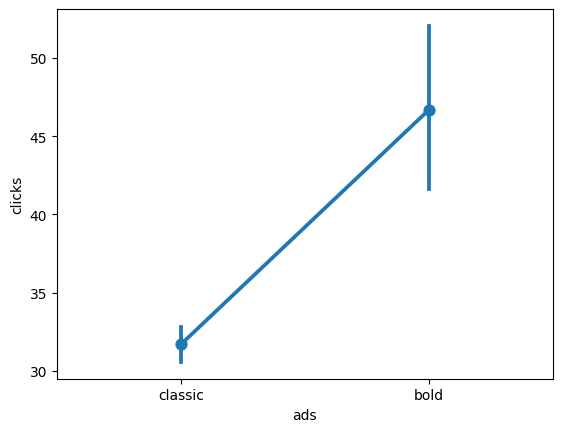

In [38]:
#первый фактор
sns.pointplot(x="ads", y="clicks", data=ads_clicks)

<Axes: xlabel='age_group', ylabel='clicks'>

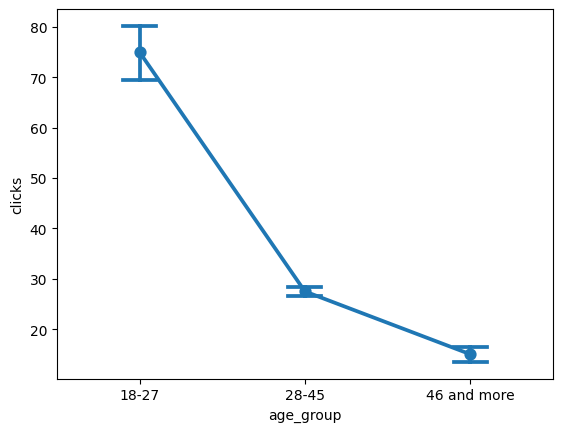

In [39]:
#второй фактор
sns.pointplot(x="age_group", y="clicks", data=ads_clicks, capsize=0.2)

In [ ]:
#взаимодействие
model_interact = smf.ols("clicks ~ C(ads)*C(age_group)", data=ads_clicks).fit()
anova_lm(model_interact)
# вывод: взаимодействие между факторами сат.значимо

,df,sum_sq,mean_sq,F,PR(>F)
C(ads),1.0,33735.001667,33735.001667,336.722432,6.446773e-60
C(age_group),2.0,400495.163333,200247.581667,1998.750536,1.636934e-264
C(ads):C(age_group),2.0,232685.043333,116342.521667,1161.260853,5.618312e-206
Residual,594.0,59510.710000,100.186380,NaN,NaN


<Axes: xlabel='ads', ylabel='clicks'>

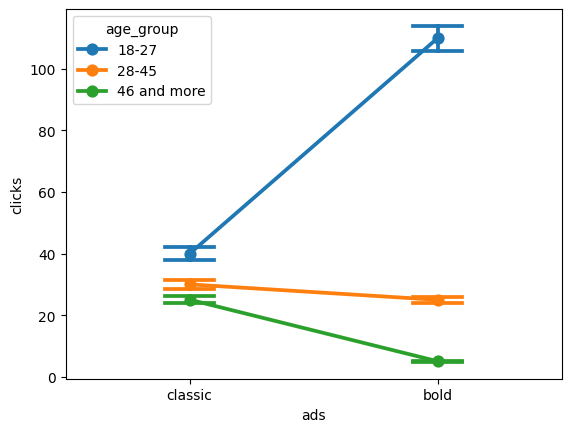

In [41]:
#взаимодействие
sns.pointplot(x="ads", y="clicks", hue="age_group", data=ads_clicks, capsize=0.2)

In [42]:
#теперь pingouin
pg.anova(data=ads_clicks, dv="clicks", between=["ads", "age_group"])
# оба фактора значимо влияют на кликабельность объявлений

,Source,SS,DF,MS,F,p-unc,np2
0,ads,33735.001667,1,33735.001667,336.722432,6.446773e-60,0.361786
1,age_group,400495.163333,2,200247.581667,1998.750536,1.636934e-264,0.870631
2,ads * age_group,232685.043333,2,116342.521667,1161.260853,5.618312e-206,0.796333
3,Residual,59510.710000,594,100.186380,NaN,NaN,NaN


In [43]:
#размер эффекта
pg.anova(data=ads_clicks, dv="clicks", between=["ads", "age_group"], effsize="n2")
# оба фактора имеют средний размер эффекта

,Source,SS,DF,MS,F,p-unc,n2
0,ads,33735.001667,1,33735.001667,336.722432,6.446773e-60,0.046440
1,age_group,400495.163333,2,200247.581667,1998.750536,1.636934e-264,0.551323
2,ads * age_group,232685.043333,2,116342.521667,1161.260853,5.618312e-206,0.320315
3,Residual,59510.710000,594,100.186380,NaN,NaN,NaN


In [44]:
#тип суммы квадратов
pg.anova(data=ads_clicks, dv="clicks", between=["ads", "age_group"], ss_type=2)
# оба фактора значимо влияют на кликабельность объявлений

,Source,SS,DF,MS,F,p-unc,np2
0,ads,33735.001667,1,33735.001667,336.722432,6.446773e-60,0.361786
1,age_group,400495.163333,2,200247.581667,1998.750536,1.636934e-264,0.870631
2,ads * age_group,232685.043333,2,116342.521667,1161.260853,5.618312e-206,0.796333
3,Residual,59510.710000,594,100.186380,NaN,NaN,NaN


In [63]:
dat_unbalanced = ads_clicks.query("id != 'S001'")

In [64]:
dat_unbalanced.head()

,id,ads,age_group,clicks
1,S002,classic,18-27,22
2,S003,classic,18-27,41
3,S004,classic,18-27,35
4,S005,classic,18-27,39
5,S006,classic,18-27,35


In [65]:
pg.anova(data=dat_unbalanced, dv="clicks", between=["ads", "age_group"], ss_type=1)

,Source,SS,DF,MS,F,p-unc,np2
0,ads,33803.779316,1.0,33803.779316,336.840901,6.486330e-60,0.362256
1,age_group,401187.127208,2.0,200593.563604,1998.833209,2.914479e-264,0.870825
2,ads * age_group,231923.625646,2.0,115961.812823,1155.512262,2.698570e-205,0.795801
3,Residual,59510.709899,593.0,100.355329,NaN,NaN,NaN


In [70]:
pg.anova(data=dat_unbalanced, dv="clicks", between=["age_group", "ads"], ss_type=3)

,Source,SS,DF,MS,F,p-unc,np2
0,age_group,399202.638264,2.0,199601.319132,1988.945896,1.048185e-263,0.870266
1,ads,33678.455412,1.0,33678.455412,335.592099,9.673077e-60,0.361399
2,age_group * ads,231923.625646,2.0,115961.812823,1155.512262,2.698570e-205,0.795801
3,Residual,59510.709899,593.0,100.355329,NaN,NaN,NaN
